# EDA de texto (NLP)

### Objetivo
Entender la estructura del texto, su distribución, posibles problemas.

Qué analizamos en un texto:

- Corpus: cantidad de documentos y de palabras.
- Longitud de textos (documentos, oraciones).
- Frecuencia de palabras / tokens.
- Distribución de clases (si es clasificación).
- Nube de palabras.
- N-gramas frecuentes.
- Limpieza: stopwords, signos de puntuación, errores ortográficos.
- TF, DF, TF-IDF (términos relevantes)
- Embeddings + PCA / t-SNE para visualizar documentos en 2D.

In [11]:
#!pip install wordcloud
#!pip install nltk

In [1]:
import nltk
from nltk.corpus import reuters
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
import string

#### Ejemplo: Datos de noticias (Reuters)

In [2]:
nltk.download('reuters')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package reuters to /Users/ari/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to /Users/ari/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/ari/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/ari/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
reuters_docs = reuters.sents()
for i in range(3):
    print(" ".join(reuters_docs[i]))


ASIAN EXPORTERS FEAR DAMAGE FROM U . S .- JAPAN RIFT Mounting trade friction between the U . S . And Japan has raised fears among many of Asia ' s exporting nations that the row could inflict far - reaching economic damage , businessmen and officials said .
They told Reuter correspondents in Asian capitals a U . S . Move against Japan might boost protectionist sentiment in the U . S . And lead to curbs on American imports of their products .
But some exporters said that while the conflict would hurt them in the long - run , in the short - term Tokyo ' s loss might be their gain .


### EDA básico

- Tamaño del corpus: cantidad de documentos y de palabras.
- Frecuencia de las palabras.

In [4]:
# Palabras en todo el corpus
flat_words = [word.lower() for sentence in reuters_docs for word in sentence]

# Frecuencia de cada palabra
word_freq = Counter(flat_words)

# Longitud del corpus
num_docs = len(reuters_docs)
num_words = len(flat_words)

print(f"Las 10 palabras más comunes: {word_freq.most_common(10)}")
print(f"El corpus contiene {num_docs} documentos y {num_words} palabras.")

Las 10 palabras más comunes: [('.', 94703), (',', 72360), ('the', 69277), ('of', 36779), ('to', 36400), ('in', 29253), ('and', 25648), ('said', 25383), ('a', 25103), ('mln', 18623)]
El corpus contiene 54716 documentos y 1720917 palabras.


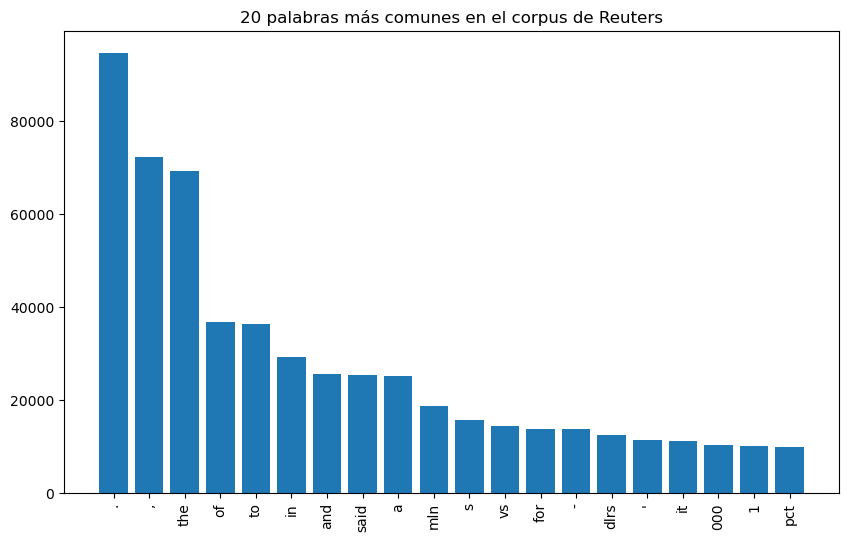

In [5]:
# Palabras más comunes
words, counts = zip(*word_freq.most_common(20))  # Las 20 palabras más comunes
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xticks(rotation=90)
plt.title("20 palabras más comunes en el corpus de Reuters")
plt.show()

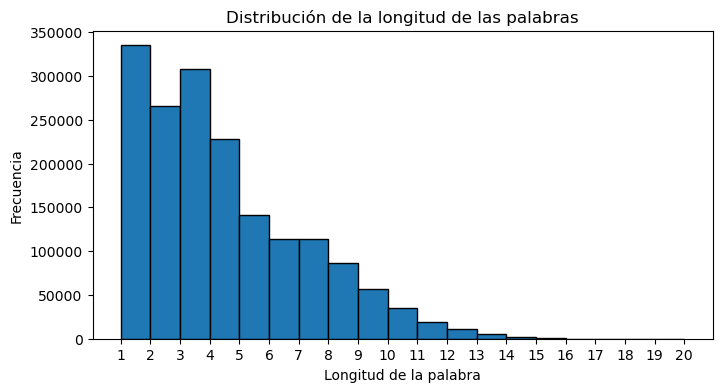

In [6]:
# Histograma de la longitud de las palabras

word_lengths = [len(word) for word in flat_words]

plt.figure(figsize=(8, 4))
plt.hist(word_lengths, bins=range(1, 21), edgecolor='black')
plt.title("Distribución de la longitud de las palabras")
plt.xlabel("Longitud de la palabra")
plt.ylabel("Frecuencia")
plt.xticks(range(1, 21)) 
plt.show()

### Limpieza básica de texto
Antes de continuar con un análisis más profundo (ej: análisis de sentimiento, clasificación, etc.), realizamos una limpieza básica: eliminación de stopwords, puntuación,etc.

In [7]:
# stopwords y signos de puntuación
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Filtrar las palabras del corpus
filtered_words = [word for word in flat_words if word not in stop_words and word not in punctuation]

# Contar las palabras filtradas
filtered_word_freq = Counter(filtered_words)
filtered_num_words = len(filtered_words)

print(f"Las 10 palabras más comunes después de la limpieza: {filtered_word_freq.most_common(10)}")
print(f"El corpus limpio contiene {filtered_num_words} palabras.")


Las 10 palabras más comunes después de la limpieza: [('said', 25383), ('mln', 18623), ('vs', 14341), ('dlrs', 12417), ('000', 10277), ('1', 9977), ('pct', 9810), ('lt', 8696), ('cts', 8361), ('year', 7529)]
El corpus limpio contiene 1030439 palabras.


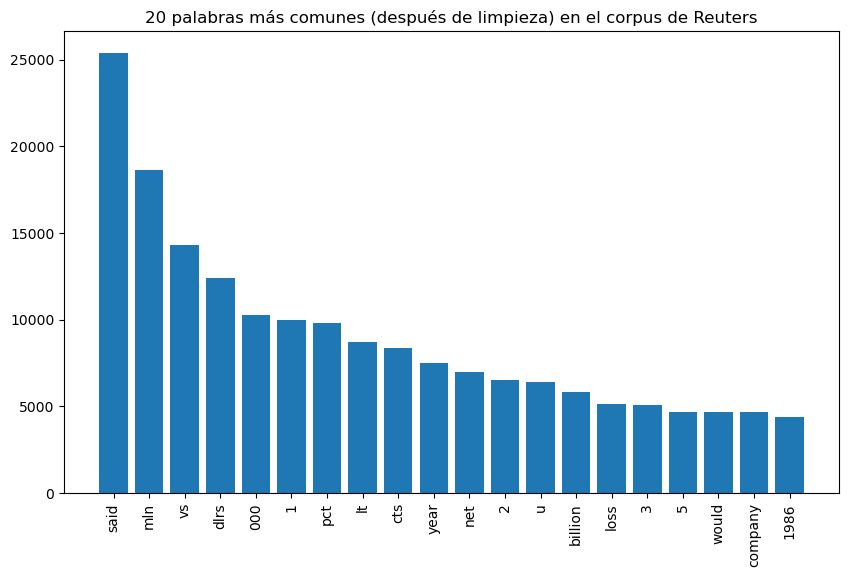

In [8]:
# Palabras más comunes después de la limpieza
words_filtered, counts_filtered = zip(*filtered_word_freq.most_common(20))  # Las 20 palabras más comunes
plt.figure(figsize=(10, 6))
plt.bar(words_filtered, counts_filtered)
plt.xticks(rotation=90)
plt.title("20 palabras más comunes (después de limpieza) en el corpus de Reuters")
plt.show()


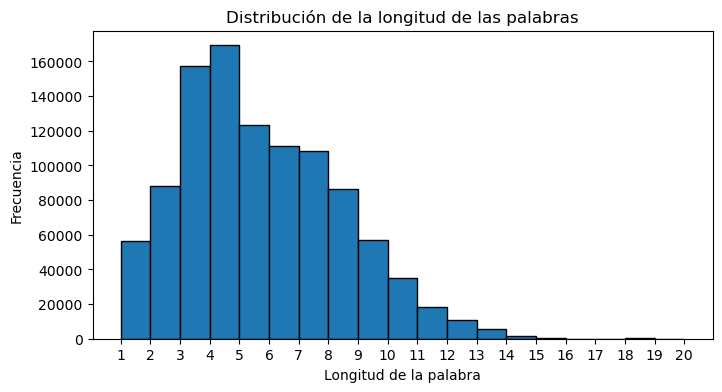

In [9]:
# Histograma de la longitud de las palabras filtradas

word_lengths = [len(word) for word in filtered_words]

plt.figure(figsize=(8, 4))
plt.hist(word_lengths, bins=range(1, 21), edgecolor='black')
plt.title("Distribución de la longitud de las palabras")
plt.xlabel("Longitud de la palabra")
plt.ylabel("Frecuencia")
plt.xticks(range(1, 21))
plt.show()


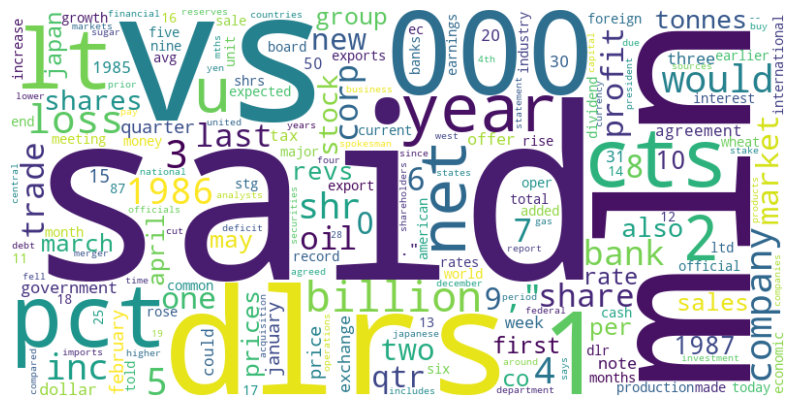

In [10]:
# Nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(filtered_word_freq)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
